## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# nacitanie dat

data = pd.read_csv("../data/Telecom-Churn.csv")
data.head()

,Unnamed: 0,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# dropneme ID zakaznika ako neuzitocny atribut
data.drop(columns=['CustomerID', 'Unnamed: 0'], inplace = True)
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [3]:
# pre ciselne atributy

print(data[['Tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            Tenure  MonthlyCharges  TotalCharges
count  7043.000000     7017.000000   7032.000000
mean     32.371149       64.707482   2283.300441
std      24.559481       30.105503   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.400000    401.450000
50%      29.000000       70.300000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


In [4]:
# pocetnosti hodnot a histogramy pre nominalne atributy (okrem cieloveho)

for x in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    print(data[x].value_counts())
    print('')

Male      3555
Female    3488
Name: Gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4921
Yes    2102
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes     

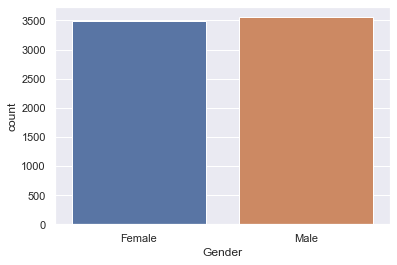

In [5]:
# ak chceme vykreslit histogramy, tak pomocou countplot()

sns.countplot(data['Gender'])

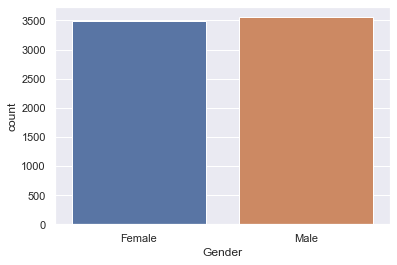

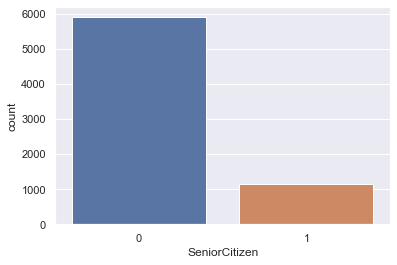

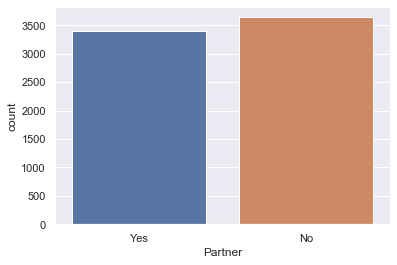

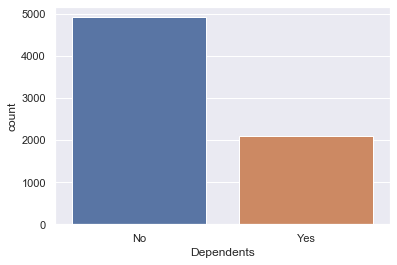

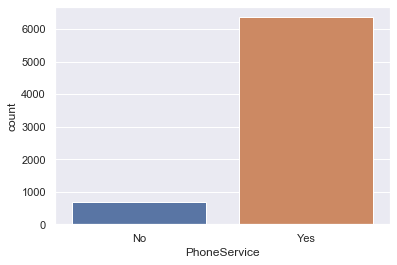

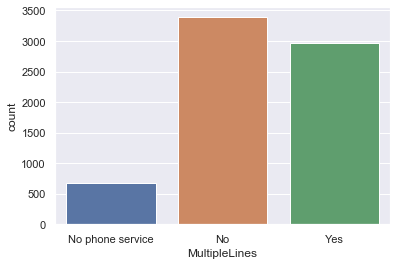

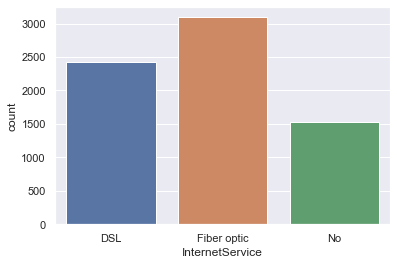

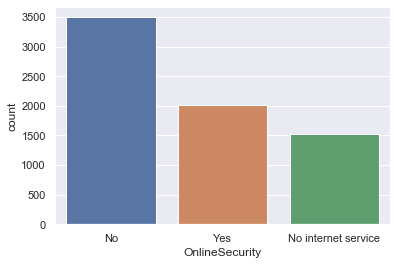

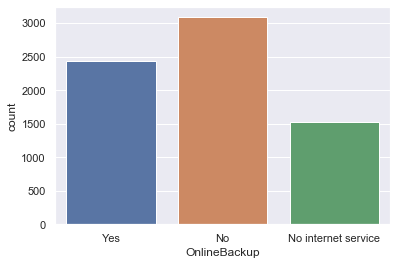

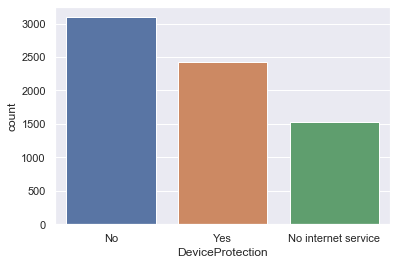

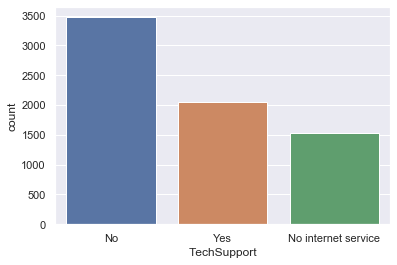

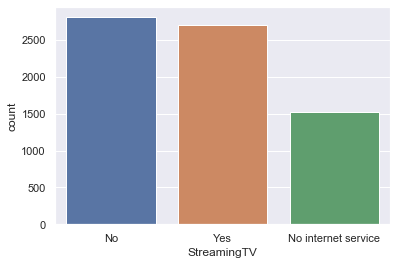

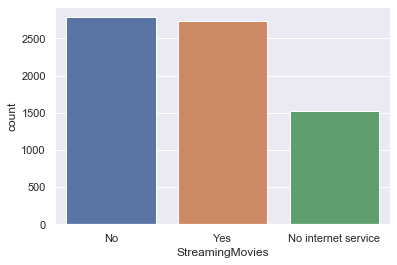

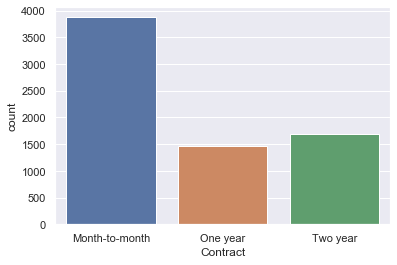

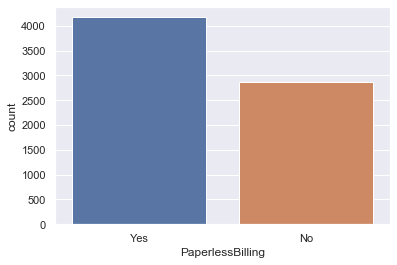

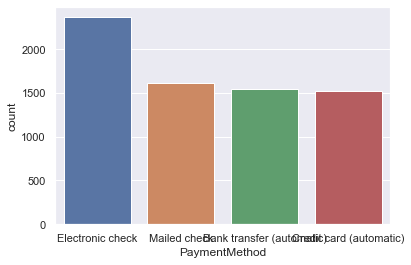

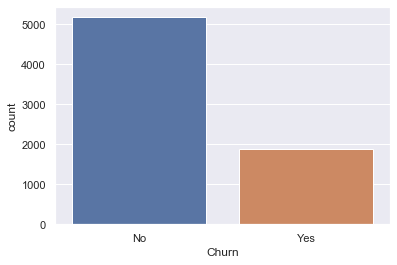

In [6]:
# ak chceme pre vsetky naraz, tak napr. takto:

for i in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    plt.figure(i)
    sns.countplot(x=i, data=data)


In [7]:
# pocty chybajucich hodnot:

for i in data.columns:
    print('Pocet chybajucich hodnot atributu', i, ':', data[i].isna().sum())

Pocet chybajucich hodnot atributu Gender : 0
Pocet chybajucich hodnot atributu SeniorCitizen : 0
Pocet chybajucich hodnot atributu Partner : 0
Pocet chybajucich hodnot atributu Dependents : 20
Pocet chybajucich hodnot atributu Tenure : 0
Pocet chybajucich hodnot atributu PhoneService : 0
Pocet chybajucich hodnot atributu MultipleLines : 0
Pocet chybajucich hodnot atributu InternetService : 0
Pocet chybajucich hodnot atributu OnlineSecurity : 0
Pocet chybajucich hodnot atributu OnlineBackup : 0
Pocet chybajucich hodnot atributu DeviceProtection : 0
Pocet chybajucich hodnot atributu TechSupport : 0
Pocet chybajucich hodnot atributu StreamingTV : 0
Pocet chybajucich hodnot atributu StreamingMovies : 0
Pocet chybajucich hodnot atributu Contract : 0
Pocet chybajucich hodnot atributu PaperlessBilling : 0
Pocet chybajucich hodnot atributu PaymentMethod : 0
Pocet chybajucich hodnot atributu MonthlyCharges : 26
Pocet chybajucich hodnot atributu TotalCharges : 11
Pocet chybajucich hodnot atribut

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [8]:
# YOUR CODE HERE

data_numeric = data[['Tenure', 'MonthlyCharges', 'TotalCharges']]
print(data_numeric.corr())

                  Tenure  MonthlyCharges  TotalCharges
Tenure          1.000000        0.247732      0.825880
MonthlyCharges  0.247732        1.000000      0.651316
TotalCharges    0.825880        0.651316      1.000000


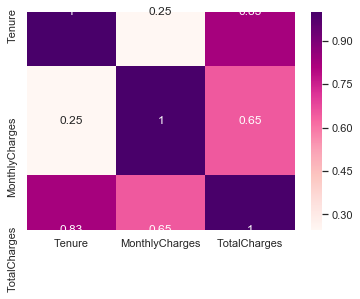

In [9]:
g = sns.heatmap(data_numeric.corr(), cmap='RdPu', annot= True)
# najviac korelovane tenure a total charges (0.83)

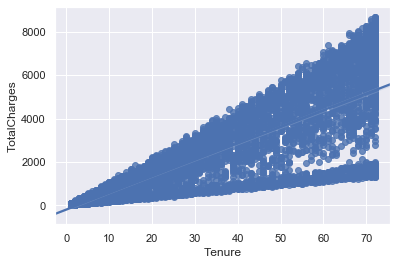

In [10]:
# zavislost mozme skusit vizualizovat scatterplotom

g = sns.regplot(data=data_numeric, x='Tenure', y='TotalCharges')

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [11]:
# diskretizacia MonthlyCharges a TotalCharges
data['MonthlyCharges_ordinal'] = pd.cut(data['MonthlyCharges'], 5)
data['TotalCharges_ordinal'] = pd.cut(data['TotalCharges'], 5)

In [12]:
# diskretizacia Tenure
data['Tenure_ordinal'] = pd.qcut(data['Tenure'], 5)

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [13]:
# kontigencne tabulky
pd.pivot_table(data, index=["Tenure_ordinal"], values="Churn")

DataError: No numeric types to aggregate

In [ ]:
pd.pivot_table(data, index=["TotalCharges_ordinal"], values="Churn")

In [ ]:
pd.pivot_table(data, index=["MonthlyCharges_ordinal"], values="Churn")

In [ ]:
pd.pivot_table(data, index=["Tenure_ordinal", "MonthlyCharges_ordinal", "TotalCharges_ordinal"], values="Churn")

In [ ]:
g = sns.FacetGrid(data, col="Tenure_ordinal", hue="MonthlyCharges_ordinal", palette="Set1")
g = (g.map(plt.hist, "Churn").add_legend())

In [ ]:
pd.pivot_table(data, index=["Gender"], values="Churn") 

In [ ]:
pd.pivot_table(data, index=["SeniorCitizen"], values="Churn")

In [ ]:
g = sns.countplot(y="Churn", hue="SeniorCitizen", data=data, palette='rainbow')

In [ ]:
g = sns.FacetGrid(data, col="Gender", hue="SeniorCitizen", palette="Set1")
g = (g.map(plt.hist, "Churn").add_legend())

In [ ]:
pd.crosstab(index=data["StreamingTV"], columns=data["StreamingMovies"])

In [ ]:
pd.crosstab(index=data["StreamingTV"], columns=data["PhoneService"])

In [ ]:
pd.crosstab(index=data["StreamingMovies"], columns=data["PhoneService"])

In [ ]:
pd.crosstab(index=data["InternetService"], columns=data["PhoneService"])

In [ ]:
g = sns.countplot(y="InternetService", hue="PhoneService", data=data, palette='rainbow')

In [ ]:
g = sns.countplot(y="StreamingMovies", hue="StreamingTV", data=data, palette='Set1')

In [ ]:
g = sns.countplot(y="StreamingTV", hue="PhoneService", data=data, palette='Set1')

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [ ]:
# nahradenie MonthlyCharges a TotalCharges

def replace_missing_MonthlyCharges(row):
    TotalCharges = row["TotalCharges"]
    Tenure = row["Tenure"]
    MonthlyCharges = row["MonthlyCharges"]
    if pd.isna(MonthlyCharges):
        return TotalCharges / Tenure
    else:
        return MonthlyCharges
    
def replace_missing_TotalCharges(row):
    TotalCharges = row["TotalCharges"]
    MonthlyCharges = row["MonthlyCharges"]
    Tenure = row["Tenure"]
    if pd.isna(TotalCharges):
        if Tenure == 0: 
            return MonthlyCharges
        else:
            return MonthlyCharges * Tenure
    else:
        return TotalCharges


data['MonthlyCharges'] = data.apply(replace_missing_MonthlyCharges, axis = 1)
data['TotalCharges'] = data.apply(replace_missing_TotalCharges, axis = 1)

print(data['MonthlyCharges'].isna().sum())
print(data['TotalCharges'].isna().sum())

In [ ]:
# pre depententsnajprv zistis pocetnosti pre kombinacie Gender a Partner

table = pd.crosstab(index=[data['Gender'], data['Partner']], columns= data['Dependents'])

print(table)

In [ ]:
# a podla toho nahradit

def replace_missing_Dependents(row):
    if pd.isna(row['Dependents']):
        if row['Gender'] == 'Female':
            if row['Partner'] == 'No':
                return 'No' 
            else:
                return 'Yes'
        else:
            if row['Partner'] == 'No':
                return 'No' 
            else:
                return 'Yes'
    else:
        return row['Dependents']

data['Dependents'] = data.apply(replace_missing_Dependents, axis = 1)

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [ ]:
# ToTalMonthCharges

data['TotalMonthCharges'] = data.eval('MonthlyCharges * Tenure')

# TotalRatio

def total_ratio(row):
    if row['TotalMonthCharges'] < row['TotalCharges']:
        return -1
    elif row['TotalMonthCharges'] == row['TotalCharges']:
        return 0
    else:
        return 1

data['TotalRatio'] = data.apply(total_ratio, axis= 1)

### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [ ]:
data = data.drop(columns=["Tenure_ordinal","MonthlyCharges_ordinal","TotalMonthCharges", "TotalCharges_ordinal"])

data['Churn'] = data['Churn'].map({"Yes":1, "No":0})

data['Gender'] = data['Gender'].map({"Female":1, "Male":0})
data['Partner'] = data['Partner'].map({'Yes':1, 'No':0})
data['Dependents'] = data['Dependents'].map({'Yes':1, 'No':0})
data['PhoneService'] = data['PhoneService'].map({'Yes':1, 'No':0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes':1, 'No':0})

data['MultipleLines'] = data['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service':0})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':0})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':0})
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':0})
data['TechSupport'] = data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':0})
data['StreamingTV'] = data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':0})
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':0})

data["Contract"] = data["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year" : 2})

data = pd.get_dummies(data, columns= ['InternetService', 'PaymentMethod' ])

data.head()

In [ ]:
# normalizovane data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normData = pd.DataFrame(scaler.fit_transform(data), index= data.index, columns= data.columns)
normData.head()

### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_data = data.drop(columns= 'Churn', axis = 1)
y_data = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state= 1)


X_normData = normData.drop(columns= 'Churn', axis = 1)
y_normData = normData['Churn']
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normData, y_normData, test_size= 0.3, random_state= 1)

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [ ]:
for i in normData.columns:
    print('Pocet chybajucich hodnot atributu', i, ':', normData[i].isna().sum())

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
k = list(range(1, 50))
weights_range = ['uniform', 'distance']
metric_range = ['euclidean', 'manhattan']  

param_grid_kNN = dict(n_neighbors=k, weights=weights_range, metric=metric_range)

grid_kNN = GridSearchCV(estimator=knn, param_grid=param_grid_kNN, cv=5, scoring='accuracy')
grid_kNN.fit(X_train_norm, y_train_norm)

print('Najlepšia kombinácia parametrov modelu "kNN" je:')
print(grid_kNN.best_params_)
print()
print('Hodnota presnosti modelu "kNN" pri tejto kombinácii je:')
print(grid_kNN.best_score_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6] 
min_samples_split_range = [2, 4, 6, 8, 10, 12]
min_samples_leaf_range = [1, 5, 10]
presort_range = [True, False]

param_grid_dt = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "decision_tree" je:')
print(grid_dt.best_params_)
print()
print('Hodnota presnosti modelu "decision_tree" pri tejto kombinácii je:')
print(grid_dt.best_score_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

n_estimators_range = [100, 300, 500, 700, 900]
oob_score_range = [True, False]
criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6]
min_samples_split_range = [2, 4, 6]
min_samples_leaf_range = [1, 5, 10]

param_grid_rf = dict(n_estimators=n_estimators_range, oob_score=oob_score_range, criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range)

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "random_forests" je:')
print(grid_rf.best_params_)
print()
print('Hodnota presnosti modelu "random_forests" pri tejto kombinácii je:')
print(grid_rf.best_score_)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [ ]:
from sklearn.metrics import roc_curve,auc

# k-NN

knn = KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors= 30, weights= 'uniform', metric= 'manhattan')
knn.fit(X_train_norm, y_train_norm)
y_knn=knn.predict(X_test_norm)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_norm, y_knn, pos_label=1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# stromy

dt = DecisionTreeClassifier()

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 5, min_samples_split= 4, presort= True)
dt.fit(X_train, y_train)
y_dt=dt.predict(X_test)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt, pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forests

rf = RandomForestClassifier()

rf = RandomForestClassifier(n_estimators= 700, oob_score= True, criterion= 'gini', max_depth= 6, min_samples_split =  6, min_samples_leaf =  10)
rf.fit(X_train, y_train)
y_rf=rf.predict(X_test)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb=nb.predict(X_test)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_nb, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)


plt.title('ROC Krivka')

plt.plot(fpr_knn, tpr_knn, color='green', label = 'kNN (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_dt, tpr_dt, color='blue', label = 'Decicion Trees (AUC = %0.2f)' % roc_auc_dt) 
plt.plot(fpr_rf, tpr_rf, color='red', label = 'Random Forests (AUC = %0.2f)' % roc_auc_rf) 
plt.plot(fpr_nb, tpr_nb, color='yellow', label = 'Naive Bayes (AUC = %0.2f)' % roc_auc_nb) 

plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],linestyle='--', color='blue')
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.ylabel('TP rate') 
plt.xlabel('FP rate') 
plt.show()

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

# k-NN

print('kNN accuracy: %0.2f' % accuracy_score(y_test_norm, y_knn))
print('kNN precision: %0.2f' %  precision_score(y_test_norm, y_knn))
print('kNN recall: %0.2f' %  recall_score(y_test_norm, y_knn))
cm_knn = confusion_matrix(y_test_norm, y_knn)
print(cm_knn)

print('Decision tree accuracy: %0.2f' % accuracy_score(y_test, y_dt))
print('Decision tree precision: %0.2f' % precision_score(y_test, y_dt))
print('Decision tree recall: %0.2f' % recall_score(y_test, y_dt))
print('')
cm_dt = confusion_matrix(y_test, y_dt)
print(cm_dt)

print('RF accuracy: %0.2f' % accuracy_score(y_test, y_rf))
print('RF precision: %0.2f' % precision_score(y_test, y_rf))
print('RF recall: %0.2f' % recall_score(y_test, y_rf))
print('')
cm_rf = confusion_matrix(y_test, y_rf)
print(cm_rf)

print('NB accuracy: %0.2f' % accuracy_score(y_test, y_nb))
print('NB precision: %0.2f' % precision_score(y_test, y_nb))
print('NB recall: %0.2f' % recall_score(y_test, y_nb))
print('')
cm_nb = confusion_matrix(y_test, y_nb)
print(cm_nb)

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_data.columns.values, class_names=['0','1'], out_file=f)

In [ ]:
# extrahovane pravidlo zo stromu napr: